### Классификация
# Задача
Бинарная классификация переменной review_score (отрицательный или положительный отзыв будет оставлен на товар)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Загружаем таблицы

In [2]:
orders = pd.read_csv("../dataset/olist_orders_dataset.csv")
order_items = pd.read_csv("../dataset/olist_order_items_dataset.csv")
customers = pd.read_csv("../dataset/olist_customers_dataset.csv")
products = pd.read_csv("../dataset/olist_products_dataset.csv")
sellers = pd.read_csv("../dataset/olist_sellers_dataset.csv")
order_reviews = pd.read_csv("../dataset/olist_order_reviews_dataset.csv")
order_payments = pd.read_csv("../dataset/olist_order_payments_dataset.csv")
product_translation = pd.read_csv("../dataset/product_category_name_translation.csv")

Перевод названий продуктов на английский

In [3]:
products = products.merge(product_translation, on='product_category_name', how='left')

Объединяем таблицы

In [4]:
order_items_full = order_items.merge(products, on='product_id', how='left')
order_items_full = order_items_full.merge(sellers, on='seller_id', how='left')

In [5]:
orders_full = orders.merge(order_items_full, on='order_id', how='left')
orders_full = orders_full.merge(customers, on='customer_id', how='left')
orders_full = orders_full.merge(order_reviews[['order_id','review_score']], on='order_id', how='left')

In [6]:
payments_agg = order_payments.groupby('order_id').agg({
    'payment_value':'sum',
    'payment_type': lambda x: x.mode()[0]
}).reset_index()
orders_full = orders_full.merge(payments_agg, on='order_id', how='left')

Создаём целевую переменную

In [7]:
orders_full['target'] = np.where(orders_full['review_score'] >= 4, 1, 0)

In [8]:
print(orders_full.shape)
orders_full.head()

(114092, 34)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score,payment_value,payment_type,target
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4.0,38.71,voucher,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,4.0,141.46,boleto,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,5.0,179.12,credit_card,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,5.0,72.20,credit_card,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,5.0,28.62,credit_card,1


In [9]:
orders_full.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
product_category_name_english     object
seller_zip_code_prefix           float64
seller_city     

Удаление дубликатов

In [10]:
duplicate_rows = orders_full[orders_full.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)
orders_full.drop_duplicates(inplace=True)

number of duplicate rows:  (401, 34)


Удаление пропусков

In [11]:
print(orders_full.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1976
order_delivered_customer_date    3243
order_estimated_delivery_date       0
order_item_id                     776
product_id                        776
seller_id                         776
shipping_limit_date               776
price                             776
freight_value                     776
product_category_name            2383
product_name_lenght              2383
product_description_lenght       2383
product_photos_qty               2383
product_weight_g                  794
product_length_cm                 794
product_height_cm                 794
product_width_cm                  794
product_category_name_english    2407
seller_zip_code_prefix            776
seller_city                       776
seller_state                      776
customer_uni

In [12]:
num_features = orders_full.select_dtypes(include=[np.number]).columns.tolist()
cat_features = orders_full.select_dtypes(include=['object']).columns.tolist()

orders_full[num_features] = orders_full[num_features].fillna(orders_full[num_features].median())
orders_full[cat_features] = orders_full[cat_features].fillna('Unknown')

In [13]:
print(orders_full.isnull().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city       

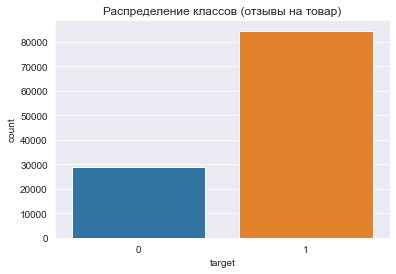

In [14]:
sns.countplot(x='target', data=orders_full)
plt.title('Распределение классов (отзывы на товар)')
plt.show()

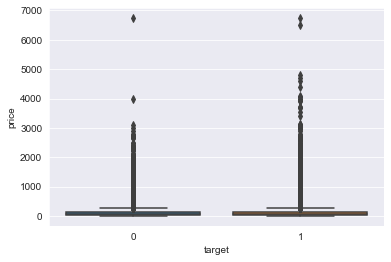

In [15]:
sns.boxplot(x='target', y='price', data=orders_full)
plt.show()

Цена товара не сильно влияет на оценку товара. Выбросы есть (дорогие товары). Также заметны выбросы

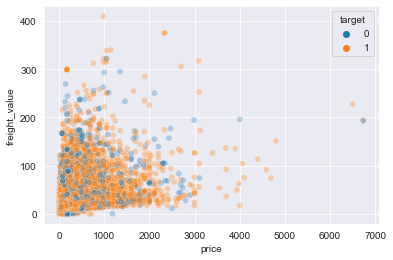

In [16]:
sns.scatterplot(x='price', y='freight_value', hue='target', data=orders_full, alpha=0.3)
plt.show()

Цена товара и стоимость доставки связаны между собой, но не сильно влияют на отзыв о товаре. Тут тоже видим выбросы

Тепловая карта

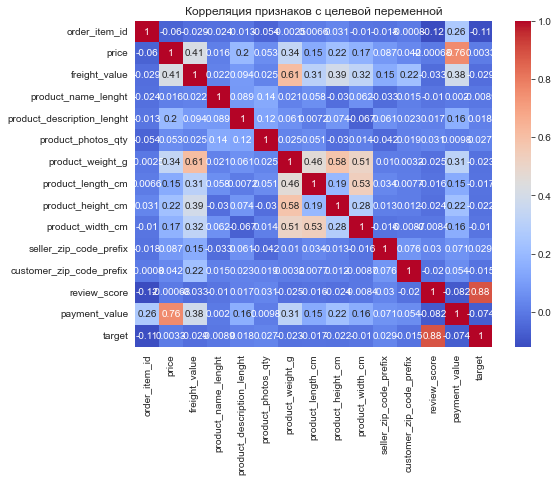

In [17]:
corr = orders_full[num_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Корреляция признаков с целевой переменной")
plt.show()

Гистограммы числовых признаков

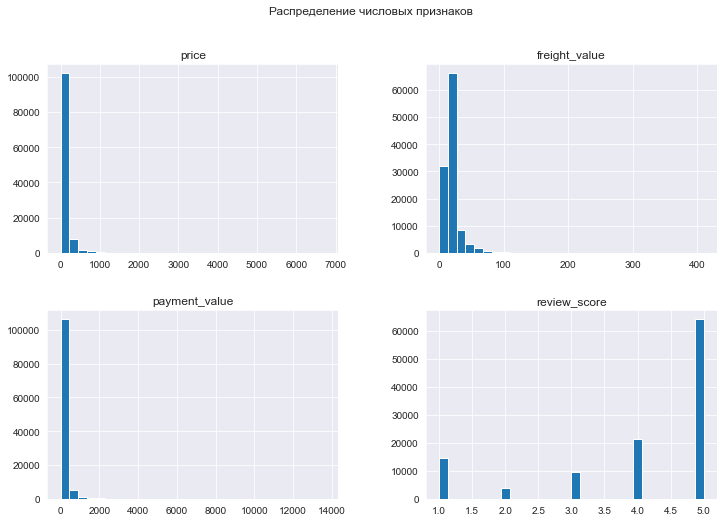

In [18]:
num_features = ['price', 'freight_value', 'payment_value', 'review_score']

orders_full[num_features].hist(bins=30, figsize=(12,8))
plt.suptitle("Распределение числовых признаков")
plt.show()

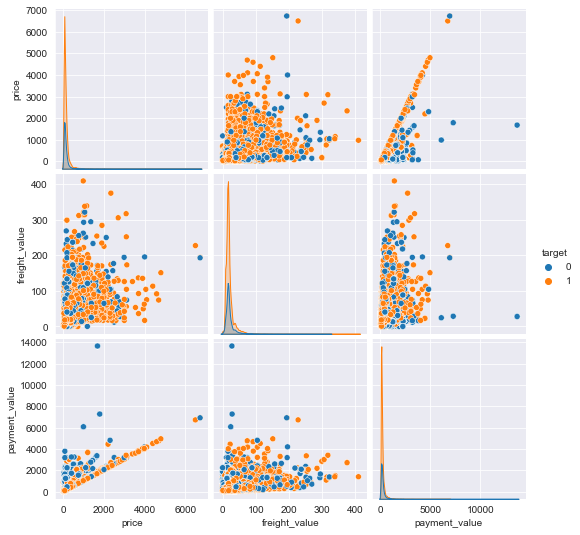

In [19]:
sns.pairplot(orders_full[['price', 'freight_value', 'payment_value', 'target']], hue='target', diag_kind='kde')
plt.show()

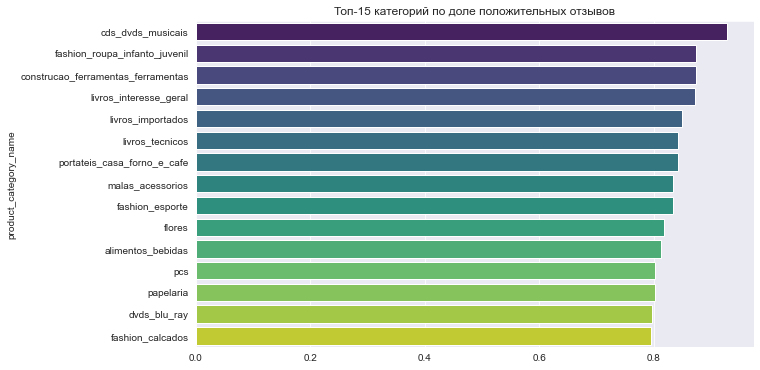

In [20]:
avg_score = orders_full.groupby('product_category_name')['target'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_score.values, y=avg_score.index, palette="viridis")
plt.title("Топ-15 категорий по доле положительных отзывов")
plt.show()

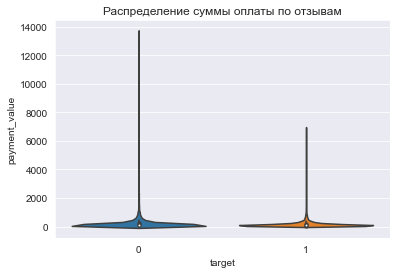

In [21]:
sns.violinplot(x='target', y='payment_value', data=orders_full, scale='width')
plt.title("Распределение суммы оплаты по отзывам")
plt.show()

Предобработка данных

In [22]:
# Преобразование временных меток
orders_full['order_purchase_timestamp'] = pd.to_datetime(
    orders_full['order_purchase_timestamp'], errors='coerce'
)
orders_full['order_approved_at'] = pd.to_datetime(
    orders_full['order_approved_at'], errors='coerce'
)
orders_full['order_delivered_carrier_date'] = pd.to_datetime(
    orders_full['order_delivered_carrier_date'], errors='coerce'
)
orders_full['order_delivered_customer_date'] = pd.to_datetime(
    orders_full['order_delivered_customer_date'], errors='coerce'
)

In [23]:
# Извлечение временных признаков
orders_full['purchase_hour'] = orders_full['order_purchase_timestamp'].dt.hour
orders_full['purchase_dayofweek'] = orders_full['order_purchase_timestamp'].dt.dayofweek
orders_full['purchase_month'] = orders_full['order_purchase_timestamp'].dt.month

In [24]:
# Расчет времени доставки
orders_full['delivery_time_days'] = (
    orders_full['order_delivered_customer_date'] - orders_full['order_purchase_timestamp']
).dt.total_seconds() / (24 * 3600)

In [25]:
# Время утверждения заказа
orders_full['approval_time_hours'] = (
    orders_full['order_approved_at'] - orders_full['order_purchase_timestamp']
).dt.total_seconds() / 3600

In [26]:
print(orders_full.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1976
order_delivered_customer_date    3243
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
product_category_name_english       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
customer_uni

In [27]:
orders_full['approval_time_hours'].fillna(orders_full['approval_time_hours'].median(), inplace=True)

orders_full['delivery_time_days'].fillna(orders_full['delivery_time_days'].median(), inplace=True)

orders_full['order_approved_at'].fillna(orders_full['order_approved_at'].median(), inplace=True)

orders_full['order_delivered_carrier_date'].fillna(orders_full['order_delivered_carrier_date'].median(), inplace=True)

orders_full['order_delivered_customer_date'].fillna(orders_full['order_delivered_customer_date'].median(), inplace=True)

In [28]:
print(orders_full.isnull().sum())


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city       

Обработка выбросов

In [29]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df

orders_full = handle_outliers(orders_full, 'price')
orders_full = handle_outliers(orders_full, 'freight_value')

Создание новых признаков

In [30]:
# Логарифмирование числовых признаков
orders_full['log_price'] = np.log1p(orders_full['price'])
orders_full['log_freight_value'] = np.log1p(orders_full['freight_value'])

In [31]:
# Признаки товара
orders_full['product_density'] = orders_full['product_weight_g'] / (
    orders_full['product_length_cm'] * orders_full['product_height_cm'] * orders_full['product_width_cm']
)
orders_full['has_description'] = orders_full['product_description_lenght'] > 0

In [32]:
# Географические признаки
orders_full['same_state'] = orders_full['seller_state'] == orders_full['customer_state']
orders_full['distance_zip'] = abs(orders_full['seller_zip_code_prefix'] - orders_full['customer_zip_code_prefix'])

In [33]:
# Агрегатные признаки по заказам
order_agg = orders_full.groupby('order_id').agg({
    'price': ['sum', 'mean', 'count'],
    'freight_value': 'sum',
    'seller_id': 'nunique'
}).reset_index()
order_agg.columns = ['order_id', 'total_order_value', 'avg_product_price', 'num_products', 'total_freight', 'unique_sellers']
orders_full = orders_full.merge(order_agg, on='order_id', how='left')

Выбираем признаки

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


num_features = [
    'log_price', 'log_freight_value', 'product_weight_g', 'product_length_cm',
    'product_height_cm', 'product_width_cm', 'product_photos_qty',
    'product_name_lenght', 'product_description_lenght', 'product_density',
    'distance_zip', 'total_order_value', 'avg_product_price', 'num_products',
    'total_freight', 'unique_sellers', 'purchase_hour', 'purchase_dayofweek',
    'purchase_month', 'delivery_time_days', 'approval_time_hours',
    'has_description', 'same_state'
]

cat_features = [
    'product_category_name_english',
    'seller_state',
    'customer_state',
    'payment_type'
]

Кодируем категориальные признаки

In [35]:
for col in cat_features:
    le = LabelEncoder()
    orders_full[col] = le.fit_transform(orders_full[col])

Масштабируем числовые признаки

In [36]:
scaler = StandardScaler()
orders_full[num_features] = scaler.fit_transform(orders_full[num_features])

In [37]:
X = orders_full[num_features + cat_features]
y = orders_full['target']

Разбиваем на тестовую и тренировочную выборки

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### K-ближайших соседей (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import GridSearchCV

Базовая модель

In [40]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Предсказания

In [41]:
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

In [42]:
print("Базовый KNN")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Базовый KNN
              precision    recall  f1-score   support

           0       0.58      0.30      0.40      5817
           1       0.79      0.92      0.85     16922

    accuracy                           0.76     22739
   macro avg       0.68      0.61      0.63     22739
weighted avg       0.74      0.76      0.74     22739

ROC-AUC: 0.6762497303558072


Подбор параметров

In [43]:
# param_grid = {
#     'n_neighbors': range(23, 27),
#     'weights': ['distance'],
#     'metric': ['euclidean', 'manhattan']
# }
param_grid = {
    'n_neighbors': [26],
    'weights': ['distance'],
    'metric': ['euclidean']
}

In [44]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 26, 'weights': 'distance'}


Лучшая модель

In [45]:
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test)
y_proba_best = best_knn.predict_proba(X_test)[:, 1]

print("KNN после подбора параметров")
print(classification_report(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_best))

KNN после подбора параметров
              precision    recall  f1-score   support

           0       0.86      0.32      0.47      5817
           1       0.81      0.98      0.89     16922

    accuracy                           0.81     22739
   macro avg       0.84      0.65      0.68     22739
weighted avg       0.82      0.81      0.78     22739

ROC-AUC: 0.7536728246421096


Матрица ошибок

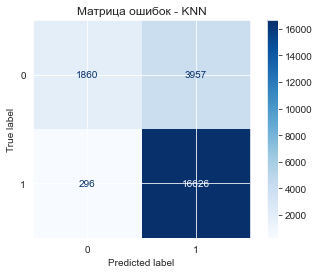

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay


ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test, cmap="Blues")
plt.title("Матрица ошибок - KNN")
plt.show()

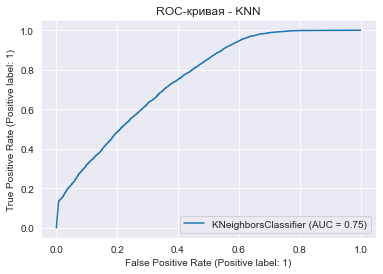

In [47]:
RocCurveDisplay.from_estimator(best_knn, X_test, y_test)
plt.title("ROC-кривая - KNN")
plt.show()

Precision-Recall кривая

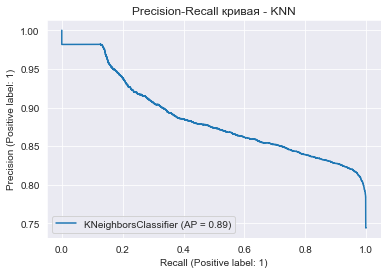

In [48]:
PrecisionRecallDisplay.from_estimator(best_knn, X_test, y_test)
plt.title("Precision-Recall кривая - KNN")
plt.show()

### Машина опорных векторов (SVM)

Базовая SVM

In [49]:
from sklearn.svm import SVC

svm = SVC(kernel='linear',
    C=1.0,
    cache_size=2000,
    max_iter=1000,
    probability=True,
    random_state=42)
svm.fit(X_train, y_train)

c:\users\андрей\pycharmprojects\ml\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(cache_size=2000, kernel='linear', max_iter=1000, probability=True,
    random_state=42)

Предсказания

In [50]:
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]

print("Базовая SVM:")
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_svm))

Базовая SVM:
              precision    recall  f1-score   support

           0       0.25      0.42      0.32      5817
           1       0.74      0.58      0.65     16922

    accuracy                           0.54     22739
   macro avg       0.50      0.50      0.48     22739
weighted avg       0.62      0.54      0.56     22739

ROC-AUC: 0.5056956716552646


Подбор параметров

Для оптимизации будем использовать RandomizedSearchCV. Также уменьшим тренировочную выборку для подбора параметров. Далее дообучим модель на полной выборке.

In [51]:
from sklearn.model_selection import RandomizedSearchCV

param_dist_svm = {
    'C': [0.01, 0.1],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

# param_dist_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto'],
#     'class_weight': ['balanced', None]
# }

In [52]:
grid_search = RandomizedSearchCV(
    SVC(probability=True, random_state=42),
    param_dist_svm,
    n_iter=3,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)
grid_search.fit(X_train[:10000], y_train[:10000])
print("Лучшие параметры SVM", grid_search.best_params_)

Лучшие параметры SVM {'kernel': 'linear', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 0.01}


Лучшая модель

In [53]:
best_svm = SVC(
    **grid_search.best_params_,
    probability=True,
    random_state=42
)
best_svm.fit(X_train, y_train)

SVC(C=0.01, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

In [54]:
y_pred_svm_best = best_svm.predict(X_test)
y_proba_svm_best = best_svm.predict_proba(X_test)[:, 1]

In [55]:
print("SVM после подбора параметров:")
print(classification_report(y_test, y_pred_svm_best))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_svm_best))

SVM после подбора параметров:
              precision    recall  f1-score   support

           0       0.47      0.44      0.46      5817
           1       0.81      0.83      0.82     16922

    accuracy                           0.73     22739
   macro avg       0.64      0.63      0.64     22739
weighted avg       0.72      0.73      0.73     22739

ROC-AUC: 0.6907679253272562


Матрица ошибок

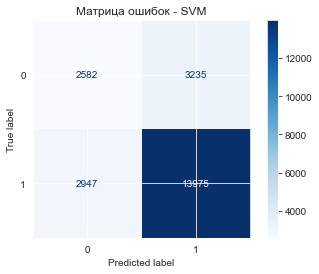

In [56]:
ConfusionMatrixDisplay.from_estimator(best_svm, X_test, y_test, cmap="Blues")
plt.title("Матрица ошибок - SVM")
plt.show()

ROC-кривая

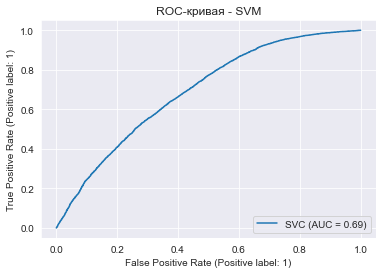

In [57]:
RocCurveDisplay.from_estimator(best_svm, X_test, y_test)
plt.title("ROC-кривая - SVM")
plt.show()

Precision-Recall кривая

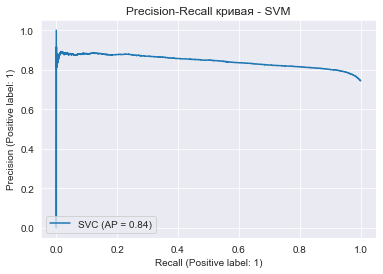

In [58]:
PrecisionRecallDisplay.from_estimator(best_svm, X_test, y_test)
plt.title("Precision-Recall кривая - SVM")
plt.show()

### Случайный лес (RandomForest)

Базовый RF

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Предсказания

In [60]:
y_pred_rf = rf_base.predict(X_test)
y_proba_rf = rf_base.predict_proba(X_test)[:, 1]

print("Базовый Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

Базовый Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.49      0.62      5817
           1       0.85      0.97      0.90     16922

    accuracy                           0.84     22739
   macro avg       0.84      0.73      0.76     22739
weighted avg       0.84      0.84      0.83     22739

ROC-AUC: 0.8017534141267285


Подбор параметров

In [61]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

In [62]:
grid_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_grid_rf,
    n_iter=8,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)
grid_rf.fit(X_train, y_train)

print("Лучшие параметры RF:", grid_rf.best_params_)

Лучшие параметры RF: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced'}


Лучшая модель

In [63]:
best_rf = grid_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)
y_proba_rf_best = best_rf.predict_proba(X_test)[:, 1]

print("RF после подбора параметров")
print(classification_report(y_test, y_pred_rf_best))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf_best))

RF после подбора параметров
              precision    recall  f1-score   support

           0       0.79      0.52      0.63      5817
           1       0.85      0.95      0.90     16922

    accuracy                           0.84     22739
   macro avg       0.82      0.74      0.76     22739
weighted avg       0.84      0.84      0.83     22739

ROC-AUC: 0.7993459133359044


Матрица ошибок

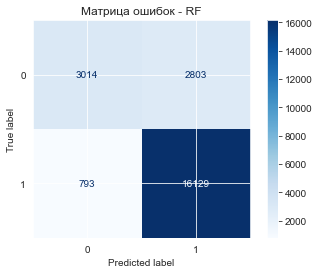

In [64]:
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap="Blues")
plt.title("Матрица ошибок - RF")
plt.show()

ROC-кривая

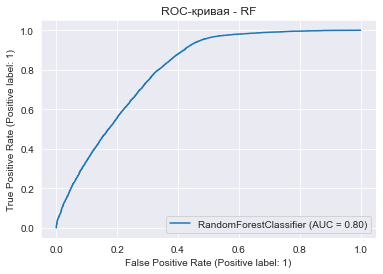

In [65]:
RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("ROC-кривая - RF")
plt.show()

Precision-Recall кривая

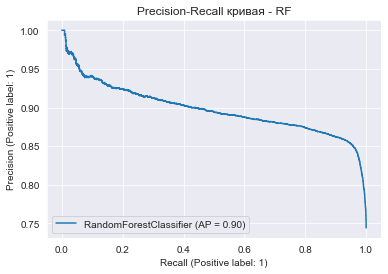

In [66]:
PrecisionRecallDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Precision-Recall кривая - RF")
plt.show()

Важность признаков

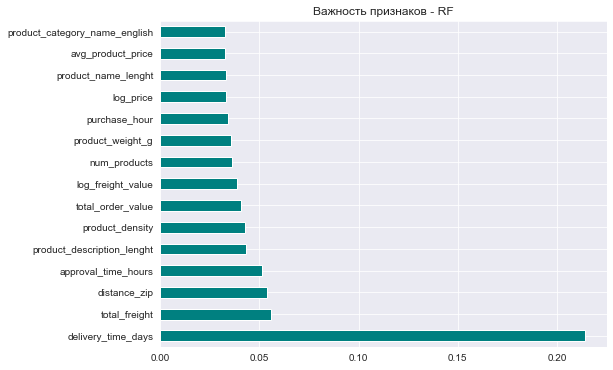

In [67]:
importances = best_rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(8,6), color="teal")
plt.title("Важность признаков - RF")
plt.show()